# Challenges of motherhood - Young MUM’s urgent questions - Part 1

In [1]:
import pandas as pd
import nltk
from collections import Counter
import time
import string
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
porter = PorterStemmer()
import statistics
import numpy as np

### Data import

The data has been split into mulitple files, since CrowdTangle can only export maximal 300.000 posts at once. Since there is a limited number of keywords on can search for with CrowdTangle, the keywords must have been split into 2 parts. Therefore duplicates can appear and have to be removed later.

In [2]:
part1_2019 = pd.read_csv('data_new/2019_Part_1_Keywords.csv',low_memory=False)
part1_2020 = pd.read_csv('data_new/2020_Part_1_Keywords.csv',low_memory=False)
part1_2021 = pd.read_csv('data_new/2021_Part_1_Keywords.csv',low_memory=False)

part2_2019 = pd.read_csv('data_new/2019_Part_2_Keywords.csv',low_memory=False)
part2_2020 = pd.read_csv('data_new/2020_Part_2_Keywords.csv',low_memory=False)
part2_2021_1 = pd.read_csv('data_new/2021_01_06_Part_2_Keywords.csv',low_memory=False)
part2_2021_2 = pd.read_csv('data_new/2021_07_12_Part_2_Keywords.csv',low_memory=False)

In [3]:
data_2019 = part1_2019.append(part2_2019)
data_2020 = part1_2020.append(part2_2020)
data_2021 = part1_2021.append([part2_2021_1,part2_2021_2])

data_total = data_2019.append([data_2020,data_2021])

<ipython-input-3-a93a85068d53>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2019 = part1_2019.append(part2_2019)
<ipython-input-3-a93a85068d53>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2020 = part1_2020.append(part2_2020)
<ipython-input-3-a93a85068d53>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_2021 = part1_2021.append([part2_2021_1,part2_2021_2])
<ipython-input-3-a93a85068d53>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_total = data_2019.append([data_2020,data_2021])


In [4]:
print(data_2019.shape)
print(data_2020.shape)
print(data_2021.shape)
print(data_total.shape)

(292455, 41)
(316513, 41)
(376944, 41)
(985912, 41)


#### Removing duplicates

In [5]:
dup_2019 = data_2019.duplicated()
dup_2020 = data_2020.duplicated()
dup_2021 = data_2021.duplicated()
dup_total = data_total.duplicated()

In [6]:
print(sum(dup_2019))
print(sum(dup_2020))
print(sum(dup_2021))
print(sum(dup_total))

41382
44973
55171
141526


In [7]:
# removing duplicates

data_2019 = data_2019.drop_duplicates()
data_2020 = data_2020.drop_duplicates()
data_2021 = data_2021.drop_duplicates()
data_total = data_total.drop_duplicates()

In [8]:
print(data_2019.shape)
print(data_2020.shape)
print(data_2021.shape)
print(data_total.shape)

(251073, 41)
(271540, 41)
(321773, 41)
(844386, 41)


In [9]:
# reset index
data_total = data_total.reset_index(drop=True)

In [10]:
print(data_total.shape)

(844386, 41)


In [11]:
pd.set_option('display.max_columns', None)

In [16]:
# is the URL a unique identifyer for the individual posts? -> almost except for 2 cases
print(data_total["URL"].unique().shape)
dup_url = data_total["URL"].duplicated()

#data_total[dup_url==True]
data_total["URL"][42714]

(844384,)


'https://www.facebook.com/260672837333530/posts/2679264632140993'

In [17]:
data_total[data_total['URL']=='https://www.facebook.com/260672837333530/posts/2679264632140993']

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score
209,Die Bergretter,DieBergretter,260672837333530,TV_SHOW,DE,Diese Seite wird von der ndF: neue deutsche Fi...,2012-01-11 10:39:57,NaN,NaN,2019-12-05 10:59:07 CET,2019-12-05,10:59:07,Link,2.493,2042,218,54,163,15,1,0,0,0,NaN,-,0,0,0,NaN,https://www.facebook.com/260672837333530/posts...,DIE BERGRETTER Folge 5 *** Heute 20:15h im ZDF...,https://www.zdf.de/serien/die-bergretter/mutte...,NaN,NaN,Die Bergretter: Mutterglück,In einem Stall in den Bergen bringt eine junge...,NaN,NaN,NaN,2.493,"-1,33"
42714,Die Bergretter,DieBergretter,260672837333530,TV_SHOW,DE,Diese Seite wird von der ndF: neue deutsche Fi...,2012-01-11 10:39:57,NaN,NaN,2019-12-05 10:59:07 CET,2019-12-05,10:59:07,Link,2.491,2042,218,54,161,15,1,0,0,0,NaN,-,0,0,0,NaN,https://www.facebook.com/260672837333530/posts...,DIE BERGRETTER Folge 5 *** Heute 20:15h im ZDF...,https://www.zdf.de/serien/die-bergretter/mutte...,NaN,NaN,Die Bergretter: Mutterglück,In einem Stall in den Bergen bringt eine junge...,NaN,NaN,NaN,2.491,"-1,38"


In [18]:
data_total.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score'],
      dtype='object')

In [19]:
data_total.head(2)

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score
0,Animal Equality Germany,AnimalEqualityGermany,259770724096761,NON_PROFIT,DE,Animal Equality ist eine internationale Organi...,2012-01-26 02:21:30,256981.0,248129.0,2019-12-19 19:45:00 CET,2019-12-19,19:45:00,Native Video,37.175,2401,4438,13657,103,41,43,9580,6901,11,owned,-,607965,1203085,0,00:01:49,https://www.facebook.com/259770724096761/posts...,#ThrowbackThursday Dieses Video hat im vergang...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.175,"128,19"
1,DKMS Deutschland,DKMS.de,100064736678801,NON_PROFIT,DE,Einfach online registrieren und Leben retten: ...,2009-06-19 09:59:49,1165498.0,1120027.0,2019-09-14 09:13:00 CEST,2019-09-14,09:13:00,Photo,37.019,9045,1130,21984,1845,21,5,2988,1,0,NaN,-,0,0,0,NaN,https://www.facebook.com/92723147978/posts/101...,„Wir brauchen einen Stammzellspender für unser...,https://www.facebook.com/92723147978/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.019,"8,71"


#### Cleaning data

In general we are interested in the column "Message".

To clean the data there are a lot of manual steps necessary:

* filtering for questions
* removing posts from page category "ZOO"
* checking the most active Pages -> removing posts from pages 
    * "Dealtown - Codes / Warehouse Deals / Coupons"
    * Kinderschnäppchen
    * AMZ Deals - Schnäppchen, Rabatte & Angebote - Sparen!
    * Amazon Schnäppchen. Preisfehler, Produktvideos und Kurioses
    * Schnäppchen & Deals & Rabattcodes | Amazing-Deals
    * Sparmutti
    * Promiflash
    * Run Run Deals Schnäppchen Rabatte DE 🇩🇪
    * Tierengel Bulgarien
    * Ich liebe Katzen
    * Schnäppchenjäger - Deals, Rabatte & Schnäppchen
    * Animal Hope Bulgaria - Varna - Support Page/Deutsch/
    * Kinder Lern TV
    * Ich liebe Hunde
    * Nähen (OHNE REGELN)
    * RTL Exclusiv
    * RTL
    * Hoffnung für Fellnasen- Alles rund um Tiere
    * Probenähen und Werbung für Schnitte und neue Stoffe
    * Online Schnäppchen, Rabatte, Preisfehler und unschlagbare Deals
    * Hilfe für alle Tiere in Not  <3     <3
    * Marktplatz der Tiere  ☼
    * Wir sind Garten®🌻
    * Die größte Tierschutzgruppe auf Facebook
* removing posts with specific words included like 
    * "Gewinnspiel"
    * "GEWINNSPIEL"
    * "WERBUNG"
    * "ADOPTED"
    * "verlosen"
    * "Verlosung"
    
Nette Seiten mit Fragen von Müttern:

* Eltern.de
* Echte Mamas 
* Mama & Papa = ICH
* Mein Kind ist mein Leben
* BabyCenter Deutschland
* Mami mit Herz und Seele
* Von Mama zu Mama 
* Von Eltern für Elter

In [20]:
# filter by questions
ind = data_total['Message'].str.contains('\?')
ind = ind.fillna(False)

In [21]:
# number of posts with questions
sum(ind)

214054

In [22]:
# take only the posts with messages
data_total = data_total[ind]

In [23]:
# drop rows with page category 'ZOO'
zoo = data_total[data_total['Page Category']=='ZOO'].index
data_total = data_total.drop(zoo)

In [24]:
# check most active pages
data_total['Page Name'].value_counts()[:20]

Eltern.de                                                      2690
Dealtown - Codes / Warehouse Deals / Coupons                   2598
Kinderschnäppchen                                              2069
Echte Mamas                                                    1641
miBaby                                                         1600
AMZ Deals - Schnäppchen, Rabatte & Angebote - Sparen!          1540
Amazon Schnäppchen. Preisfehler, Produktvideos und Kurioses    1421
Schnäppchen & Deals & Rabattcodes | Amazing-Deals              1392
Sparmutti                                                      1338
Mama & Papa = ICH                                              1306
Promiflash                                                     1291
Mein Kind ist mein Leben                                       1243
Run Run Deals Schnäppchen Rabatte DE 🇩🇪                         974
Baby Sweets                                                     844
omamashop.de                                    

In [25]:
# check out the posts from the listed pages
#data_total[data_total['Page Name']=="Die größte Tierschutzgruppe auf Facebook"]["Message"]

In [26]:
# remove post from page "Dealtown - Codes / Warehouse Deals / Coupons"
data_total[data_total['Page Name']=="Dealtown - Codes / Warehouse Deals / Coupons"]["Message"]

13510     🚨🚨FREEBIE🚨🚨 ❗️Schnell sein❗️ ❌Freebie statt 59...
22231     ❌9,99€ statt 19,99€❌ 👉Einfach einen der Codes ...
22232     ❌3,56€ statt 11,86€❌ 👉Code aus den Kommentaren...
23646     ❌1,64€ statt 10,99€❌ 👉Einfach einen der Einmal...
23647     ❌2,61€ statt 8,99€❌ Einfach einen der Codes au...
                                ...                        
822624    💢WAREHOUSE DEAL💢 ❌17,55€ statt 25,53€❌ Zum War...
822625    ❌5,99€❌ Hat der Deal funktioniert? Bitte kurz ...
822626    💢WAREHOUSE DEAL💢 ❌7,13€ statt 13,09€❌ Zum Ware...
822627    💢WAREHOUSE DEAL💢 ❌4,78€ statt 12,90€❌ Zum Ware...
822628    ❌2,99€ statt 8,99€❌ Hat der Deal funktioniert?...
Name: Message, Length: 2598, dtype: object

In [27]:
# remove post from page "Dealtown - Codes / Warehouse Deals / Coupons"
ind_page = data_total[data_total['Page Name']=="Dealtown - Codes / Warehouse Deals / Coupons"].index
data_total = data_total.drop(ind_page)

In [28]:
# remove post from page "Kinderschnäppchen"
ind_page = data_total[data_total['Page Name']=="Kinderschnäppchen"].index
data_total = data_total.drop(ind_page)

In [29]:
# remove post from page "AMZ Deals - Schnäppchen, Rabatte & Angebote - Sparen!"
ind_page = data_total[data_total['Page Name']=="AMZ Deals - Schnäppchen, Rabatte & Angebote - Sparen!"].index
data_total = data_total.drop(ind_page)

In [30]:
# remove post from page "Amazon Schnäppchen. Preisfehler, Produktvideos und Kurioses"
ind_page = data_total[data_total['Page Name']=="Amazon Schnäppchen. Preisfehler, Produktvideos und Kurioses"].index
data_total = data_total.drop(ind_page)

In [31]:
# remove post from page "Schnäppchen & Deals & Rabattcodes | Amazing-Deals"
ind_page = data_total[data_total['Page Name']=="Schnäppchen & Deals & Rabattcodes | Amazing-Deals"].index
data_total = data_total.drop(ind_page)

In [32]:
# remove post from page "Sparmutti"
ind_page = data_total[data_total['Page Name']=="Sparmutti"].index
data_total = data_total.drop(ind_page)

In [33]:
# remove post from page "Promiflash"
ind_page = data_total[data_total['Page Name']=="Promiflash"].index
data_total = data_total.drop(ind_page)

In [34]:
# remove post from page "Run Run Deals Schnäppchen Rabatte DE 🇩🇪"
ind_page = data_total[data_total['Page Name']=="Run Run Deals Schnäppchen Rabatte DE 🇩🇪"].index
data_total = data_total.drop(ind_page)

In [35]:
# remove post from page "Tierengel Bulgarien"
ind_page = data_total[data_total['Page Name']=="Tierengel Bulgarien"].index
data_total = data_total.drop(ind_page)

In [36]:
# remove post from page "Ich liebe Katzen"
ind_page = data_total[data_total['Page Name']=="Ich liebe Katzen"].index
data_total = data_total.drop(ind_page)

In [37]:
# remove post from page "Schnäppchenjäger - Deals, Rabatte & Schnäppchen"
ind_page = data_total[data_total['Page Name']=="Schnäppchenjäger - Deals, Rabatte & Schnäppchen"].index
data_total = data_total.drop(ind_page)

In [38]:
# remove post from page "Animal Hope Bulgaria - Varna - Support Page/Deutsch/"
ind_page = data_total[data_total['Page Name']=="Animal Hope Bulgaria - Varna - Support Page/Deutsch/"].index
data_total = data_total.drop(ind_page)

In [39]:
# remove post from page "Kinder Lern TV"
ind_page = data_total[data_total['Page Name']=="Kinder Lern TV"].index
data_total = data_total.drop(ind_page)

In [40]:
# remove post from page "Ich liebe Hunde"
ind_page = data_total[data_total['Page Name']=="Ich liebe Hunde"].index
data_total = data_total.drop(ind_page)

In [41]:
# remove post from page "Nähen (OHNE REGELN)"
ind_page = data_total[data_total['Page Name']=="Nähen (OHNE REGELN)"].index
data_total = data_total.drop(ind_page)

In [42]:
# remove post from page "RTL Exclusiv"
ind_page = data_total[data_total['Page Name']=="RTL Exclusiv"].index
data_total = data_total.drop(ind_page)

In [43]:
# remove post from page "RTL"
ind_page = data_total[data_total['Page Name']=="RTL"].index
data_total = data_total.drop(ind_page)

In [44]:
# remove post from page "Hoffnung für Fellnasen- Alles rund um Tiere"
ind_page = data_total[data_total['Page Name']=="Hoffnung für Fellnasen- Alles rund um Tiere"].index
data_total = data_total.drop(ind_page)

In [45]:
# remove post from page "Probenähen und Werbung für Schnitte und neue Stoffe"
ind_page = data_total[data_total['Page Name']=="Probenähen und Werbung für Schnitte und neue Stoffe"].index
data_total = data_total.drop(ind_page)

In [46]:
# remove post from page "Online Schnäppchen, Rabatte, Preisfehler und unschlagbare Deals"
ind_page = data_total[data_total['Page Name']=="Online Schnäppchen, Rabatte, Preisfehler und unschlagbare Deals"].index
data_total = data_total.drop(ind_page)

In [47]:
# remove post from page "Hilfe für alle Tiere in Not  <3     <3"
ind_page = data_total[data_total['Page Name']=="Hilfe für alle Tiere in Not  <3     <3"].index
data_total = data_total.drop(ind_page)

In [48]:
# remove post from page "Marktplatz der Tiere  ☼"
ind_page = data_total[data_total['Page Name']=="Marktplatz der Tiere  ☼"].index
data_total = data_total.drop(ind_page)

In [49]:
# remove post from page "Wir sind Garten®🌻"
ind_page = data_total[data_total['Page Name']=="Wir sind Garten®🌻"].index
data_total = data_total.drop(ind_page)

In [50]:
# remove post from page "Die größte Tierschutzgruppe auf Facebook"
ind_page = data_total[data_total['Page Name']=="Die größte Tierschutzgruppe auf Facebook"].index
data_total = data_total.drop(ind_page) 

Removing posts with specific keywords:

In [51]:
# "Gewinnspiel"
ind_remove = data_total['Message'].str.contains('Gewinnspiel')
print(sum(ind_remove))
data_total = data_total[np.logical_not(ind_remove)]

2376


In [52]:
ind_remove = data_total['Message'].str.contains('GEWINNSPIEL')
print(sum(ind_remove))
data_total = data_total[np.logical_not(ind_remove)]

149


In [53]:
ind_remove = data_total['Message'].str.contains('WERBUNG')
print(sum(ind_remove))
data_total = data_total[np.logical_not(ind_remove)]

176


In [54]:
ind_remove = data_total['Message'].str.contains('ADOPTED')
print(sum(ind_remove))
data_total = data_total[np.logical_not(ind_remove)]

4


In [55]:
ind_remove = data_total['Message'].str.contains('verlosen')
print(sum(ind_remove))
data_total = data_total[np.logical_not(ind_remove)]

415


In [56]:
ind_remove = data_total['Message'].str.contains('Verlosung')
print(sum(ind_remove))
data_total = data_total[np.logical_not(ind_remove)]

153


In [57]:
#data_total['Message'][ind_remove][:20]

In [58]:
#data_total["Page Category"].unique()

In [59]:
# reset index
data_total = data_total.reset_index(drop=True)

### Data Exploration and Overview statistics 

In [60]:
data_total.shape

(192307, 41)

In [61]:
#pd.set_option('display.max_columns', None)
data_total.head()

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score
0,DKMS Deutschland,DKMS.de,100064736678801,NON_PROFIT,DE,Einfach online registrieren und Leben retten: ...,2009-06-19 09:59:49,1165498.0,1120027.0,2019-09-14 09:13:00 CEST,2019-09-14,09:13:00,Photo,37.019,9045,1130,21984,1845,21,5,2988,1,0,NaN,-,0,0,0,NaN,https://www.facebook.com/92723147978/posts/101...,„Wir brauchen einen Stammzellspender für unser...,https://www.facebook.com/92723147978/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.019,"8,71"
1,Sternenzauber & Frühchenwunder e.V.,sternchenundfruehchen,100064701367893,NON_PROFIT,DE,Wir möchten verwaisten Eltern in den dunklen S...,2016-12-19 01:36:47,NaN,NaN,2019-09-15 19:00:27 CEST,2019-09-15,19:00:27,Photo,30.917,9565,1959,14350,2477,13,2,2479,2,70,NaN,-,0,0,0,NaN,https://www.facebook.com/217613252021047/posts...,Zum Nachdenken! Irgendwo da draußen gibt es ei...,https://www.facebook.com/217613252021047/photo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.917,"220,84"
2,Gerald G. Grosz,GeraldGroszOfficial,100043943508108,POLITICIAN,AT,Willkommen auf der offiziellen Facebook-Seite ...,2014-06-26 08:00:13,107914.0,116947.0,2019-08-07 19:34:05 CEST,2019-08-07,19:34:05,Native Video,18.292,6840,744,9778,294,32,527,24,50,3,owned,Yes,71308,291453,0,00:02:49,https://www.facebook.com/686924954713065/posts...,"„Wenn die Menschen nichts mehr zu essen haben,...",https://www.facebook.com/GeraldGroszOfficial/v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.292,"4,82"
3,SOKO Tierschutz,sokotierschutz.ev,162271687230474,NON_PROFIT,DE,Tierquäler können sich nicht verstecken! Wir s...,2012-10-03 07:22:06,63146.0,62362.0,2019-07-11 20:15:29 CEST,2019-07-11,20:15:29,Photo,14.080,848,1821,6352,64,9,1,2802,2183,0,NaN,-,0,0,0,NaN,https://www.facebook.com/162271687230474/posts...,"Kommentar von Friedrich Von zwei Leben, drei G...",https://www.facebook.com/sokotierschutz.ev/pho...,NaN,NaN,Photos from SOKO Tierschutz's post,NaN,NaN,NaN,NaN,14.080,"9,64"
4,Y-Kollektiv,YKollektiv,517303605133886,MEDIA_NEWS_COMPANY,DE,Wir sind Y! Und wir machen Web-Dokus und Repor...,2016-05-13 08:16:46,57539.0,61684.0,2019-07-25 17:17:04 CEST,2019-07-25,17:17:04,Native Video,10.464,4641,3280,1126,607,506,58,52,168,26,crosspost,-,2029258,2327626,2326973,00:15:50,https://www.facebook.com/517303605133886/posts...,Eine Geburt ohne Hebamme - alleine irgendwo in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.464,"58,13"


In [62]:
data_total.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score'],
      dtype='object')

In [63]:
data_total[['Message','Link Text']].tail(20)

,Message,Link Text
192287,Seht ihr es auch? 😱 Mutter entdeckt unbekannte...,Timeline photos
192288,Ab dem 11. Oktober werden die kostenlosen Coro...,"Corona: Müssen Frauen, die ihre Babys stillen,..."
192289,"Geburtswehen leiten, wie der Name schon sagt, ...",Was löst Geburtswehen aus und was hilft bei Sc...
192290,Brustkrebs kann jeden treffen – auch Schwanger...,Brustkrebs in der Schwangerschaft – was bedeut...
192291,Das diesjährige Motto der Met Gala lautete „In...,Met Gala: Das sind die 5 weirdesten und 5 best...
192292,Im aktuellen Song „Range Brothers“ mit Baby Ke...,Kendrick Lamar verwirrt mit Ad-Libs
192293,Die Rapperin verkündete auf Instagram die Gebu...,Cardi B ist erneut Mutter geworden
192294,Der Rapper veranstaltete einen Back to School ...,Lil Baby spendet an seine Heimatstadt
192295,Lil Nas X veröffentlicht seine neue Videosingl...,Lil Nas X geht für sein neues Musikvideo ins G...
192296,🎧 Neue Folge von The Real Word Podcast: Mit de...,The Real Word - der ehrliche Podcast: Was Frau...


In [64]:
data_total['Post Created'] = pd.to_datetime(data_total['Post Created'])

/Users/magdalena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


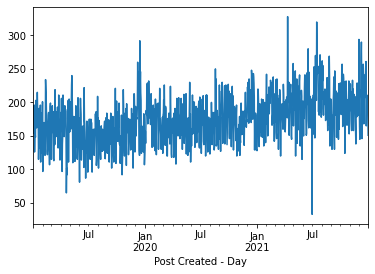

In [66]:
# number of posts per day
data_total['Post Created - Day'] = data_total['Post Created'].dt.to_period('D')
date_day_size = data_total.groupby(['Post Created - Day']).size()
date_day_size.plot()

In [67]:
data_total['Post Created - Year'] = data_total['Post Created'].dt.year
data_total['Post Created - Month'] = data_total['Post Created'].dt.month
data_total['Post Created - Year Month'] = data_total['Post Created'].dt.to_period('M')

/Users/magdalena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


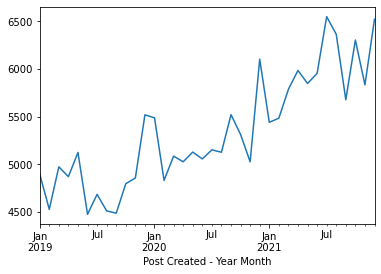

In [68]:
# number of posts per month
date_year_month_size = data_total.groupby(['Post Created - Year Month']).size()
date_year_month_size.plot()

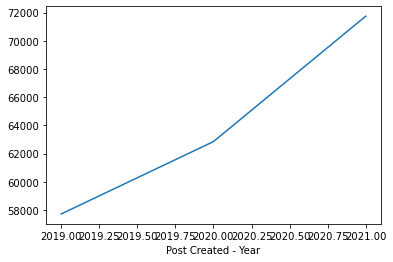

In [69]:
# number of posts per year
date_year_size = data_total.groupby(['Post Created - Year']).size()
date_year_size.plot()

In [70]:
date_year_size

Post Created - Year
2019    57719
2020    62850
2021    71738
dtype: int64

In [71]:
# average post length
data_total['Post Length'] = [len(l) for l in data_total['Message']]
round(statistics.mean(data_total['Post Length']),2)

870.37

### Data Preprocessing

We are intersted in the "Message" of the posts.

In [ ]:
df_message = pd.DataFrame({'sentences': data_total['Message']})

In [68]:
# tokenization
df_message['tokenized_sents'] = df_message['sentences'].apply(nltk.word_tokenize)

In [69]:
# case folding
df_message['lower_sents'] = [list(map(lambda x: x.lower(), w)) for w in df_message['tokenized_sents']]

In [70]:
def remove_stop_words(text):
    filtered_sentence = []
    for w in text:
        if w not in stopwords.words('german'):
            filtered_sentence.append(w) 
    return filtered_sentence

In [71]:
# stopwords filtering
df_message['stopwords_removed'] = df_message['lower_sents'].apply(remove_stop_words)

In [73]:
# join tokens to string to easily export and import data again
df_message['stopwords_removed_as_string'] = df_message['stopwords_removed'].str.join(' ')
df_message.to_csv('preprocessed_data_1.csv')

In [82]:
# removing all forms of punctuation
df_message['punctuation_removed'] = [[w for w in l if w not in string.punctuation] for l in df_message['stopwords_removed']]

In [83]:
# removing all numbers
match_digits = ('(\d+)')
df_message['numbers_removed'] = [[w for w in l if re.match(match_digits,w)==None] for l in df_message['punctuation_removed']]

In [84]:
# removing all dashes
df_message['dashes_removed'] = [[w for w in l if w!='–'] for l in df_message['numbers_removed']]

In [93]:
# removing all quotes
df_message['quotes_removed'] = [[w for w in l if w!='„'] for l in df_message['dashes_removed']]
df_message['quotes_removed'] = [[w for w in l if w!='“'] for l in df_message['quotes_removed']]

In [94]:
# stemming
df_message['stemming'] = [[porter.stem(w) for w in l] for l in df_message['quotes_removed']]

In [95]:
# join tokens to string to easily export and import data again
df_message['dashes_removed_as_string'] = df_message['dashes_removed'].str.join(' ')
df_message['quotes_removed_as_string'] = df_message['quotes_removed'].str.join(' ')
df_message['stemming_as_string'] = df_message['stemming'].str.join(' ')

In [87]:
# export data
df_message.to_csv('preprocessed_data_2.csv')  

In [97]:
# order columns of dataset
df_message_ordered = df_message[["sentences", "tokenized_sents", "lower_sents","stopwords_removed","stopwords_removed_as_string","punctuation_removed","numbers_removed","dashes_removed","dashes_removed_as_string","quotes_removed","quotes_removed_as_string","stemming","stemming_as_string"]]

In [98]:
df_message_ordered

,sentences,tokenized_sents,lower_sents,stopwords_removed,stopwords_removed_as_string,punctuation_removed,numbers_removed,dashes_removed,dashes_removed_as_string,quotes_removed,quotes_removed_as_string,stemming,stemming_as_string
0,„Wir brauchen einen Stammzellspender für unser...,"[„, Wir, brauchen, einen, Stammzellspender, fü...","[„, wir, brauchen, einen, stammzellspender, fü...","[„, brauchen, stammzellspender, kleinen, junge...",„ brauchen stammzellspender kleinen jungen . j...,"[„, brauchen, stammzellspender, kleinen, junge...","[„, brauchen, stammzellspender, kleinen, junge...","[„, brauchen, stammzellspender, kleinen, junge...",„ brauchen stammzellspender kleinen jungen jem...,"[brauchen, stammzellspender, kleinen, jungen, ...",brauchen stammzellspender kleinen jungen jeman...,"[brauchen, stammzellspend, kleinen, jungen, je...",brauchen stammzellspend kleinen jungen jemande...
1,Zum Nachdenken! Irgendwo da draußen gibt es ei...,"[Zum, Nachdenken, !, Irgendwo, da, draußen, gi...","[zum, nachdenken, !, irgendwo, da, draußen, gi...","[nachdenken, !, irgendwo, draußen, gibt, frau,...",nachdenken ! irgendwo draußen gibt frau . 35 j...,"[nachdenken, irgendwo, draußen, gibt, frau, 35...","[nachdenken, irgendwo, draußen, gibt, frau, ja...","[nachdenken, irgendwo, draußen, gibt, frau, ja...",nachdenken irgendwo draußen gibt frau jahre ki...,"[nachdenken, irgendwo, draußen, gibt, frau, ja...",nachdenken irgendwo draußen gibt frau jahre ki...,"[nachdenken, irgendwo, draußen, gibt, frau, ja...",nachdenken irgendwo draußen gibt frau jahr kin...
2,"„Wenn die Menschen nichts mehr zu essen haben,...","[„, Wenn, die, Menschen, nichts, mehr, zu, ess...","[„, wenn, die, menschen, nichts, mehr, zu, ess...","[„, menschen, mehr, essen, ,, gebt, kuchen., “...","„ menschen mehr essen , gebt kuchen. “ österre...","[„, menschen, mehr, essen, gebt, kuchen., “, ö...","[„, menschen, mehr, essen, gebt, kuchen., “, ö...","[„, menschen, mehr, essen, gebt, kuchen., “, ö...",„ menschen mehr essen gebt kuchen. “ österreic...,"[menschen, mehr, essen, gebt, kuchen., österre...",menschen mehr essen gebt kuchen. österreichisc...,"[menschen, mehr, essen, gebt, kuchen., österre...",menschen mehr essen gebt kuchen. österreichisc...
3,"Kommentar von Friedrich Von zwei Leben, drei G...","[Kommentar, von, Friedrich, Von, zwei, Leben, ...","[kommentar, von, friedrich, von, zwei, leben, ...","[kommentar, friedrich, zwei, leben, ,, drei, g...","kommentar friedrich zwei leben , drei gewissen...","[kommentar, friedrich, zwei, leben, drei, gewi...","[kommentar, friedrich, zwei, leben, drei, gewi...","[kommentar, friedrich, zwei, leben, drei, gewi...",kommentar friedrich zwei leben drei gewissenlo...,"[kommentar, friedrich, zwei, leben, drei, gewi...",kommentar friedrich zwei leben drei gewissenlo...,"[kommentar, friedrich, zwei, leben, drei, gewi...",kommentar friedrich zwei leben drei gewissenlo...
4,Eine Geburt ohne Hebamme - alleine irgendwo in...,"[Eine, Geburt, ohne, Hebamme, -, alleine, irge...","[eine, geburt, ohne, hebamme, -, alleine, irge...","[geburt, hebamme, -, alleine, irgendwo, natur,...",geburt hebamme - alleine irgendwo natur . alle...,"[geburt, hebamme, alleine, irgendwo, natur, al...","[geburt, hebamme, alleine, irgendwo, natur, al...","[geburt, hebamme, alleine, irgendwo, natur, al...",geburt hebamme alleine irgendwo natur alleinge...,"[geburt, hebamme, alleine, irgendwo, natur, al...",geburt hebamme alleine irgendwo natur alleinge...,"[geburt, hebamm, allein, irgendwo, natur, alle...",geburt hebamm allein irgendwo natur alleingebu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192302,Mit der Geburt eines Kindes ändert sich der Al...,"[Mit, der, Geburt, eines, Kindes, ändert, sich...","[mit, der, geburt, eines, kindes, ändert, sich...","[geburt, kindes, ändert, alltag, schlagartig, ...",geburt kindes ändert alltag schlagartig . scho...,"[geburt, kindes, ändert, alltag, schlagartig, ...","[geburt, kindes, ändert, alltag, schlagartig, ...",

In [99]:
# export data
df_message_ordered.to_csv('preprocessed_data_3.csv')  

### Import already preprocessed Data:

In [201]:
df_message = pd.read_csv('preprocessed_data_3.csv',low_memory=False)

In [202]:
df_message_new = pd.DataFrame({'stemming_as_string': df_message['stemming_as_string']})

In [203]:
df_message_new['stemming_as_tokens'] = df_message_new['stemming_as_string'].str.split("\\s")

In [204]:
df_message_new = df_message_new.dropna()

In [205]:
df_message_new.shape

(192273, 2)

#### Additional Preprocessing steps after looking at the output of the LDA

In [206]:
df_message_new['preprocessed'] = [[w for w in l if w!='–-'] for l in df_message_new['stemming_as_tokens']]

In [207]:
df_message_new['preprocessed'] = [[w for w in l if w!='...'] for l in df_message_new['preprocessed']]

In [208]:
df_message_new['preprocessed'] = [[w for w in l if w!='http'] for l in df_message_new['preprocessed']]

In [209]:
df_message_new['preprocessed'] = [[w for w in l if w!='..'] for l in df_message_new['preprocessed']]

In [210]:
df_message_new['preprocessed'] = [[w for w in l if w!='”'] for l in df_message_new['preprocessed']]

In [211]:
df_message_new['preprocessed'] = [[w for w in l if w!='``'] for l in df_message_new['preprocessed']]

In [212]:
df_message_new['preprocessed'] = [[w for w in l if w!='●'] for l in df_message_new['preprocessed']]

In [213]:
df_message_new['preprocessed'] = [[w for w in l if w!='\'s'] for l in df_message_new['preprocessed']]

In [214]:
df_message_new['preprocessed'] = [[w for w in l if w!='\'\''] for l in df_message_new['preprocessed']]

In [215]:
df_message_new['preprocessed'] = [[w for w in l if w!=' '] for l in df_message_new['preprocessed']]

In [216]:
df_message_new['preprocessed'] = [[w for w in l if w!='•'] for l in df_message_new['preprocessed']]

In [217]:
df_message_new['preprocessed'] = [[w for w in l if w!='⠀⠀⠀⠀⠀⠀⠀⠀⠀'] for l in df_message_new['preprocessed']]

In [218]:
df_message_new['preprocessed'] = [[w for w in l if w!='--'] for l in df_message_new['preprocessed']]

In [219]:
df_message_new['preprocessed'] = [[w for w in l if w!='»'] for l in df_message_new['preprocessed']]

In [220]:
df_message_new['preprocessed'] = [[w for w in l if w!='«'] for l in df_message_new['preprocessed']]

In [221]:
df_message_new['preprocessed'] = [[w for w in l if w!='//www.youtube.com/watch'] for l in df_message_new['preprocessed']]

In [222]:
df_message_new['preprocessed'] = [[w for w in l if w!='+++'] for l in df_message_new['preprocessed']]

In [223]:
df_message_new['preprocessed'] = [[w for w in l if w!='►'] for l in df_message_new['preprocessed']]

In [224]:
df_message_new['preprocessed'] = [[w for w in l if w!='✅'] for l in df_message_new['preprocessed']]

In [225]:
df_message_new['preprocessed'] = [[w for w in l if w!='’'] for l in df_message_new['preprocessed']]

In [226]:
df_message_new['preprocessed'] = [[w for w in l if w!='➡️'] for l in df_message_new['preprocessed']]

In [227]:
df_message_new['preprocessed'] = [[w for w in l if w!='✨'] for l in df_message_new['preprocessed']]

In [228]:
df_message_new['preprocessed'] = [[w for w in l if w!='language=de_d'] for l in df_message_new['preprocessed']]

In [229]:
df_message_new['preprocessed'] = [[w for w in l if w!='linkcode=sl1'] for l in df_message_new['preprocessed']]

In [230]:
df_message_new['preprocessed'] = [[w for w in l if w!='__mk_de_de='] for l in df_message_new['preprocessed']]

In [231]:
df_message_new['preprocessed'] = [[w for w in l if w!='☀️'] for l in df_message_new['preprocessed']]

In [232]:
df_message_new['preprocessed'] = [[w for w in l if w!='ie=utf8'] for l in df_message_new['preprocessed']]

In [233]:
df_message_new['preprocessed'] = [[w for w in l if w!='⭐'] for l in df_message_new['preprocessed']]

In [234]:
df_message_new['preprocessed'] = [[w for w in l if w!='❤️'] for l in df_message_new['preprocessed']]

In [235]:
df_message_new['preprocessed'] = [[w for w in l if w!='utm_medium=soci'] for l in df_message_new['preprocessed']]

In [236]:
df_message_new['preprocessed'] = [[w for w in l if w!='epa=hashtag'] for l in df_message_new['preprocessed']]

In [237]:
df_message_new['preprocessed'] = [[w for w in l if w!='source=feed_text'] for l in df_message_new['preprocessed']]

In [238]:
df_message_new['preprocessed'] = [[w for w in l if w!='💗'] for l in df_message_new['preprocessed']]

In [239]:
df_message_new['preprocessed'] = [[w for w in l if w!='💜'] for l in df_message_new['preprocessed']]

In [240]:
df_message_new.head()

,stemming_as_string,stemming_as_tokens,preprocessed
0,brauchen stammzellspend kleinen jungen jemande...,"[brauchen, stammzellspend, kleinen, jungen, je...","[brauchen, stammzellspend, kleinen, jungen, je..."
1,nachdenken irgendwo draußen gibt frau jahr kin...,"[nachdenken, irgendwo, draußen, gibt, frau, ja...","[nachdenken, irgendwo, draußen, gibt, frau, ja..."
2,menschen mehr essen gebt kuchen. österreichisc...,"[menschen, mehr, essen, gebt, kuchen., österre...","[menschen, mehr, essen, gebt, kuchen., österre..."
3,kommentar friedrich zwei leben drei gewissenlo...,"[kommentar, friedrich, zwei, leben, drei, gewi...","[kommentar, friedrich, zwei, leben, drei, gewi..."
4,geburt hebamm allein irgendwo natur alleingebu...,"[geburt, hebamm, allein, irgendwo, natur, alle...","[geburt, hebamm, allein, irgendwo, natur, alle..."


In [241]:
df_message_new['preprocessed_as_string'] = df_message_new['preprocessed'].str.join(' ')

In [242]:
# export data
df_message_new.to_csv('preprocessed_data_4.csv')  

#### Filtering out English text

In [243]:
import fasttext

In [244]:
model = fasttext.load_model('lid.176.bin')

In [245]:
df_message_new['language'] = df_message_new['preprocessed_as_string'].apply(model.predict)

In [246]:
df_message_new['language_label'] = [a_tuple[0] for a_tuple in df_message_new['language']]

In [247]:
df_message_new['language_acc'] = [a_tuple[1] for a_tuple in df_message_new['language']]

In [248]:
df_message_new

,stemming_as_string,stemming_as_tokens,preprocessed,preprocessed_as_string,language,language_label,language_acc
0,brauchen stammzellspend kleinen jungen jemande...,"[brauchen, stammzellspend, kleinen, jungen, je...","[brauchen, stammzellspend, kleinen, jungen, je...",brauchen stammzellspend kleinen jungen jemande...,"((__label__de,), [0.9400924444198608])","(__label__de,)",[0.9400924444198608]
1,nachdenken irgendwo draußen gibt frau jahr kin...,"[nachdenken, irgendwo, draußen, gibt, frau, ja...","[nachdenken, irgendwo, draußen, gibt, frau, ja...",nachdenken irgendwo draußen gibt frau jahr kin...,"((__label__de,), [0.9671519994735718])","(__label__de,)",[0.9671519994735718]
2,menschen mehr essen gebt kuchen. österreichisc...,"[menschen, mehr, essen, gebt, kuchen., österre...","[menschen, mehr, essen, gebt, kuchen., österre...",menschen mehr essen gebt kuchen. österreichisc...,"((__label__de,), [0.9720797538757324])","(__label__de,)",[0.9720797538757324]
3,kommentar friedrich zwei leben drei gewissenlo...,"[kommentar, friedrich, zwei, leben, drei, gewi...","[kommentar, friedrich, zwei, leben, drei, gewi...",kommentar friedrich zwei leben drei gewissenlo...,"((__label__de,), [0.9775356650352478])","(__label__de,)",[0.9775356650352478]
4,geburt hebamm allein irgendwo natur alleingebu...,"[geburt, hebamm, allein, irgendwo, natur, alle...","[geburt, hebamm, allein, irgendwo, natur, alle...",geburt hebamm allein irgendwo natur alleingebu...,"((__label__de,), [0.9440410733222961])","(__label__de,)",[0.9440410733222961]
...,...,...,...,...,...,...,...
192302,geburt kind ändert alltag schlagartig schon ma...,"[geburt, kind, ändert, alltag, schlagartig, sc...","[geburt, kind, ändert, alltag, schlagartig, sc...",geburt kind ändert alltag schlagartig schon ma...,"((__label__de,), [0.986617922782898])","(__label__de,)",[0.986617922782898]
192303,viel krefeld müssen weihnachtsfeiertagen arbei...,"[viel, krefeld, müssen, weihnachtsfeiertagen, ...","[viel, krefeld, müssen, weihnachtsfeiertagen, ...",viel krefeld müssen weihnachtsfeiertagen arbei...,"((__label__de,), [0.9846705198287964])","(__label__de,)",[0.9846705198287964]
192304,wer stark gefährdet situationen ansteckungsgef...,"[wer, stark, gefährdet, situationen, ansteckun...","[wer, stark, gefährdet, situationen, ansteckun...",wer stark gefährdet situationen ansteckungsgef...,"((__label__de,), [0.9650313258171082])","(__label__de,)",[0.9650313258171082]
192305,möchtest muskulatur aufbauen stark heutig blog...,"[möchtest, muskulatur, aufbauen, stark, heutig...","[möchtest, muskulatur, aufbauen, stark, heutig...",möchtest muskulatur aufbauen stark heutig blog...,"((__label__de,), [0.8154775500297546])","(__label__de,)",[0.8154775500297546]


In [263]:
df1 = df_message_new.loc[((df_message_new['language_acc'] > 0.6) & (df_message_new['language_label']==('__label__en',)))]
ind = df1.index
print(len(ind))

459


In [264]:
ind

Int64Index([   655,   1090,   2423,   2850,   6532,   8505,   8856,   9583,
             12908,  13027,
            ...
            183756, 183760, 183761, 183763, 183766, 184081, 185383, 185523,
            187478, 190421],
           dtype='int64', length=459)

In [265]:
df_message_new.loc[ind]

,stemming_as_string,stemming_as_tokens,preprocessed,preprocessed_as_string,language,language_label,language_acc
655,wahnsinn zeit fliegt schon monat her tag gebur...,"[wahnsinn, zeit, fliegt, schon, monat, her, ta...","[wahnsinn, zeit, fliegt, schon, monat, her, ta...",wahnsinn zeit fliegt schon monat her tag gebur...,"((__label__en,), [0.507649302482605])","(__label__en,)",[0.507649302482605]
1090,babi schlafen coachen,"[babi, schlafen, coachen]","[babi, schlafen, coachen]",babi schlafen coachen,"((__label__en,), [0.575350284576416])","(__label__en,)",[0.575350284576416]
2423,werbung more day to go and we are readi for th...,"[werbung, more, day, to, go, and, we, are, rea...","[werbung, more, day, to, go, and, we, are, rea...",werbung more day to go and we are readi for th...,"((__label__en,), [0.5066161155700684])","(__label__en,)",[0.5066161155700684]
2850,bitt 😳 method gar unnorm ...,"[bitt, 😳, method, gar, unnorm, ...]","[bitt, 😳, method, gar, unnorm]",bitt 😳 method gar unnorm,"((__label__en,), [0.5428992509841919])","(__label__en,)",[0.5428992509841919]
6532,kennt schon cocoo•m tragetüch handmad austria ...,"[kennt, schon, cocoo•m, tragetüch, handmad, au...","[kennt, schon, cocoo•m, tragetüch, handmad, au...",kennt schon cocoo•m tragetüch handmad austria ...,"((__label__en,), [0.5257049798965454])","(__label__en,)",[0.5257049798965454]
...,...,...,...,...,...,...,...
184081,materi http //www.farmville2gifthouse.com/farm...,"[materi, http, //www.farmville2gifthouse.com/f...","[materi, //www.farmville2gifthouse.com/farmvil...",materi //www.farmville2gifthouse.com/farmville...,"((__label__en,), [0.5259086489677429])","(__label__en,)",[0.5259086489677429]
185383,stylisch unterweg tragen inzwischen mehr trans...,"[stylisch, unterweg, tragen, inzwischen, mehr,...","[stylisch, unterweg, tragen, inzwischen, mehr,...",stylisch unterweg tragen inzwischen mehr trans...,"((__label__en,), [0.5367388129234314])","(__label__en,)",[0.5367388129234314]
185523,grati huggies® blackweek deal sichern http //b...,"[grati, huggies®, blackweek, deal, sichern, ht...","[grati, huggies®, blackweek, deal, sichern, //...",grati huggies® blackweek deal sichern //bit.ly...,"((__label__en,), [0.5023903250694275])","(__label__en,)",[0.5023903250694275]
187478,materi http //www.farmville2gifthouse.com/farm...,"[materi, http, //www.farmville2gifthouse.com/f...","[materi, //www.farmville2gifthouse.com/farmvil...",materi //www.farmville2gifthouse.com/farmville...,"((__label__en,), [0.5259086489677429])","(__label__en,)",[0.5259086489677429]


In [258]:
df_message_new.shape

(192273, 7)

In [259]:
df_message_new = df_message_new.drop(ind)

In [261]:
# reset index
df_message_new = df_message_new.reset_index(drop=True)

In [262]:
# export data
df_message_new.to_csv('preprocessed_data_5.csv')